In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


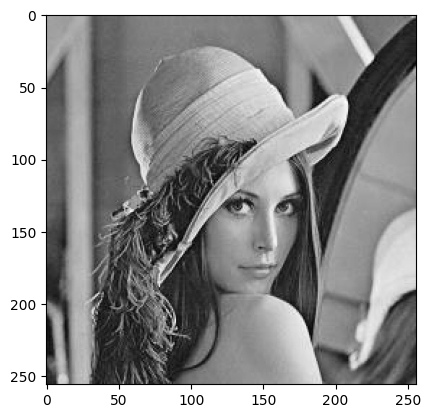

In [46]:
img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gImg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

In [47]:
gOutImg = np.zeros((gImg1.shape[0], gImg1.shape[1]))

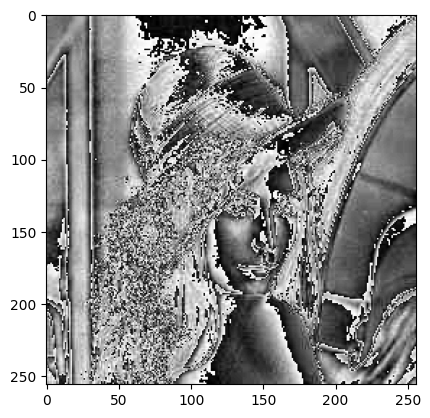

In [48]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    val = gImg1[h,w] % 64
    val = val * 4
    gOutImg[h,w] = val

plt.imshow(gOutImg, cmap = 'gray')
#cv2_imshow(gOutImg)

In [49]:
equalVal = 200
widht = 5

min = equalVal - widht
max = equalVal + widht

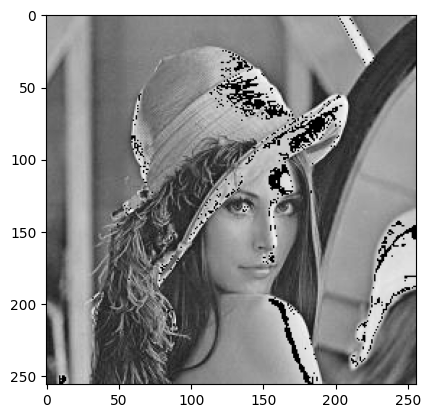

In [50]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    if(gImg1[h,w] > min and gImg1[h,w] < max):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = gImg1[h,w]

plt.imshow(gOutImg, cmap = 'gray')
#cv2_imshow(gOutImg)

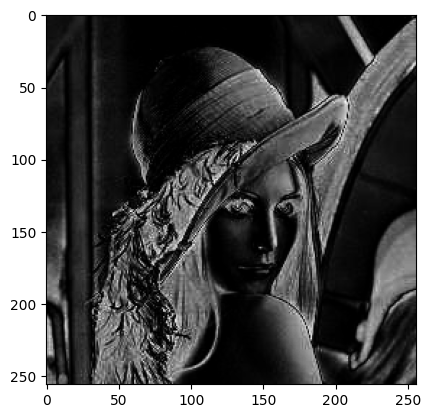

In [51]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    val = 255*(gImg1[h,w]/128 -1)*(gImg1[h,w]/128 -1)
    gOutImg[h,w] = val

plt.imshow(gOutImg, cmap = 'gray')
#cv2_imshow(gOutImg)

In [52]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

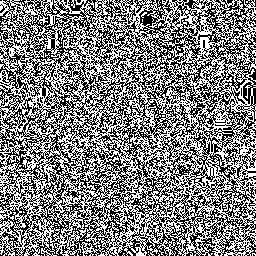

In [53]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = 255

#plt.imshow(gOutImg, cmap = 'gray')
cv2_imshow(gOutImg)

(286, 322)


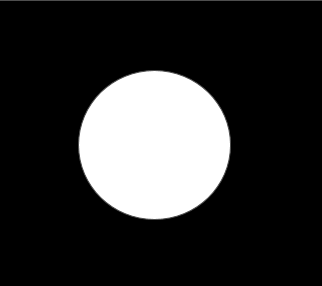

In [54]:
img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg2.shape)
cv2_imshow(gImg2)

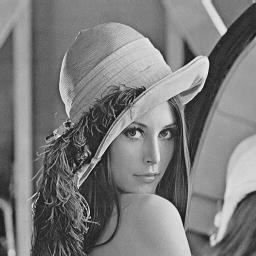

In [56]:
gWaterMarker = gImg1.copy()

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = gImg2[h,w]
    if(imVal > 128):
      if(gImg1[h,w] % 2 == 0):
        gWaterMarker[h,w] += 1
    else:
      if(gImg1[h,w] % 2 == 1):
        gWaterMarker[h,w] -= 1

cv2_imshow(gWaterMarker)

In [57]:
planeNumber = 1
planeValue = 1
for i in range(planeNumber-1):
  planevalue = planeValue * 2

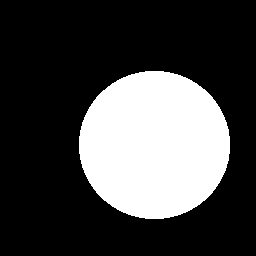

In [58]:
for h in range(0, gWaterMarker.shape[0]):
  for w in range(0, gWaterMarker.shape[1]):
    imVal = (int)(gWaterMarker[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutImg[h,w] = 0
    else:
      gOutImg[h,w] = 255

cv2_imshow(gOutImg)